In [2]:
import pandas as pd
import numpy as np


Introduction About the Data :
    The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

1. ID      : Unique identifier of each diamond
2. Carat   : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
3. Cut     : Quality of Diamond Cut
4. Color   : Color of Diamond
5. Clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these
            characteristics under 10-power magnification.
6. Depth   : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat,
            top surface)
7. Table   : A diamond's table is the facet which can be seen when the stone is viewed face up.
        x  : Diamond X dimension
        y  : Diamond Y dimension
        x  : Diamond Z dimension
8. Target variable
    Price  : Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [7]:
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv(r'E:\Projects\notebook\data\test.csv')

In [13]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129050 entries, 0 to 129049
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       129050 non-null  int64  
 1   carat    129050 non-null  float64
 2   cut      129050 non-null  object 
 3   color    129050 non-null  object 
 4   clarity  129050 non-null  object 
 5   depth    129050 non-null  float64
 6   table    129050 non-null  float64
 7   x        129050 non-null  float64
 8   y        129050 non-null  float64
 9   z        129050 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 9.8+ MB


In [17]:
df.describe()

,id,carat,depth,table,x,y,z
count,129050.000000,129050.000000,129050.000000,129050.000000,129050.000000,129050.000000,129050.000000
mean,258097.500000,0.789256,61.820522,57.239608,5.711767,5.716336,3.531802
std,37253.670457,0.462502,1.080249,1.918908,1.109666,1.102485,0.690749
min,193573.000000,0.200000,53.200000,51.000000,0.000000,0.000000,0.000000
25%,225835.250000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000
50%,258097.500000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,290359.750000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000
max,322622.000000,4.500000,70.600000,70.000000,10.140000,10.140000,31.800000


In [18]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [20]:
df=df.drop(columns=['id'])

In [24]:
df.duplicated().sum()

np.int64(535)

In [29]:
num_cols=df.columns[df.dtypes!='object']

In [30]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [31]:
cat_cols=df.columns[df.dtypes=='object']

In [32]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129050 entries, 0 to 129049
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    129050 non-null  float64
 1   cut      129050 non-null  object 
 2   color    129050 non-null  object 
 3   clarity  129050 non-null  object 
 4   depth    129050 non-null  float64
 5   table    129050 non-null  float64
 6   x        129050 non-null  float64
 7   y        129050 non-null  float64
 8   z        129050 non-null  float64
dtypes: float64(6), object(3)
memory usage: 8.9+ MB


In [35]:
df['cut'].value_counts()

cut
Ideal        61223
Premium      33498
Very Good    25468
Good          7554
Fair          1307
Name: count, dtype: int64

In [36]:
df['color'].value_counts()

color
G    29561
E    24086
F    22767
H    20576
D    16167
I    11685
J     4208
Name: count, dtype: int64

In [37]:
df['clarity'].value_counts()

clarity
SI1     35336
VS2     32201
VS1     20519
SI2     20167
VVS2    10317
VVS1     7327
IF       2791
I1        392
Name: count, dtype: int64

In [38]:
df.shape

(129050, 9)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


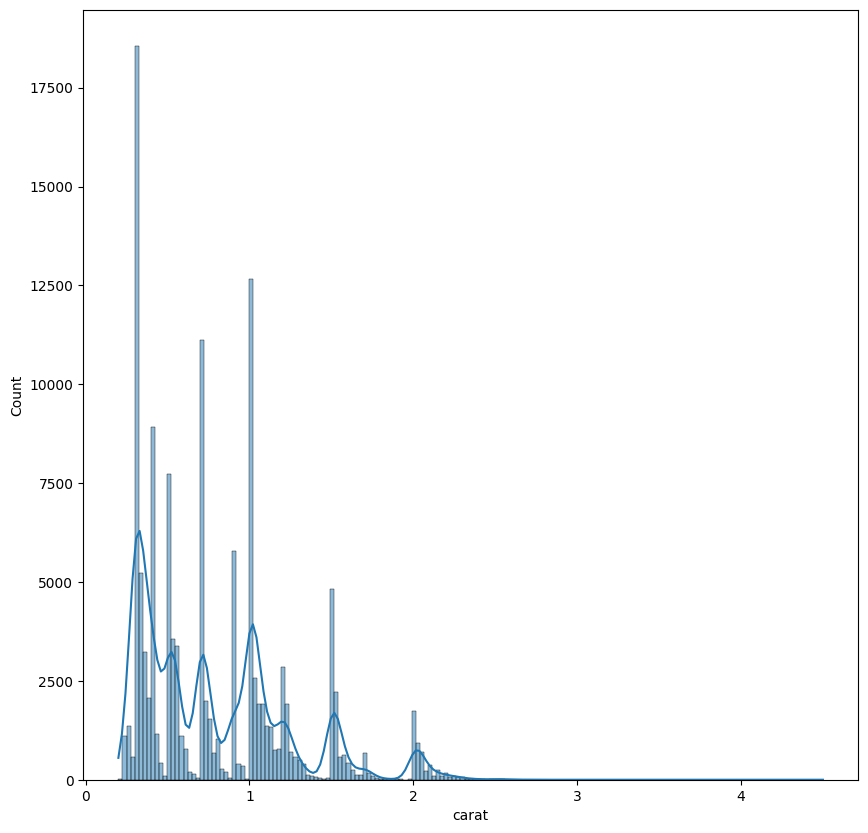

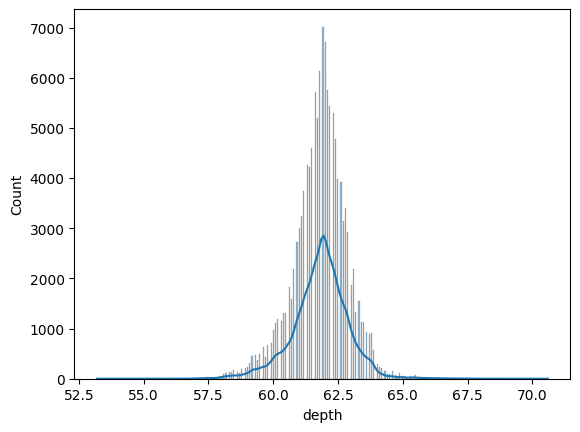

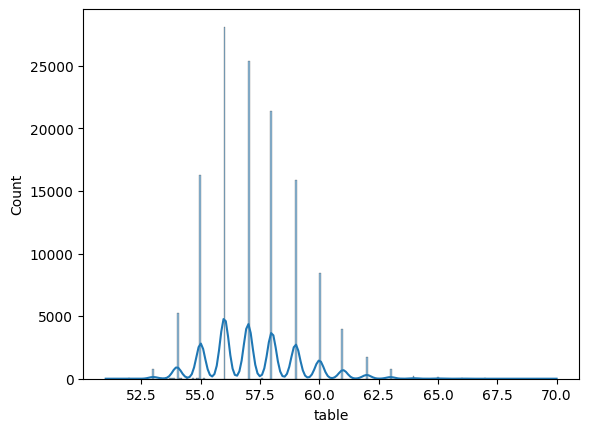

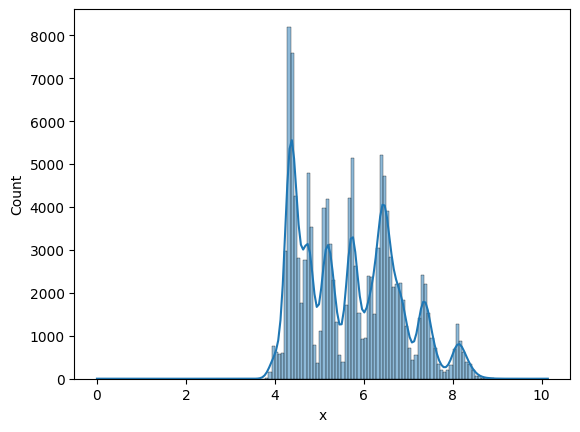

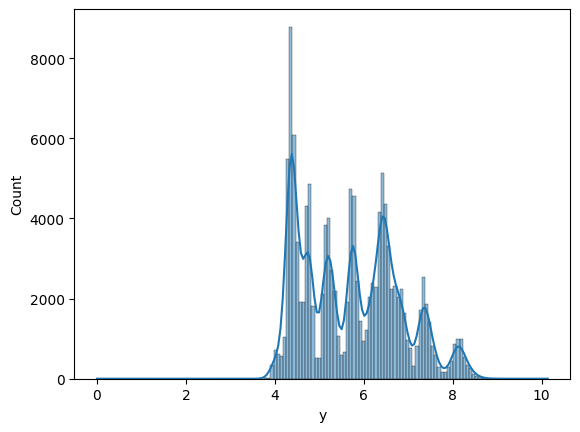

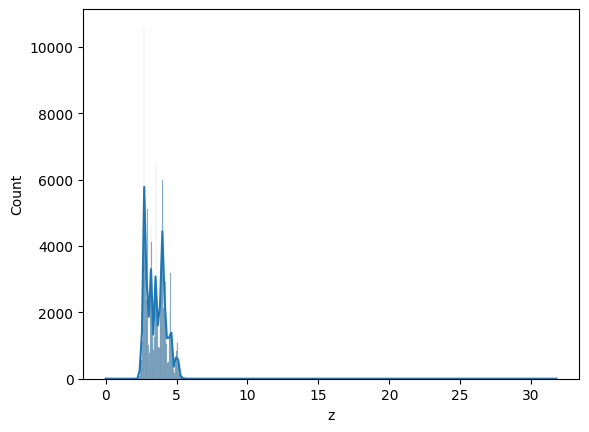

In [42]:
plt.figure(figsize=(10,10))
for i in num_cols:
    sns.histplot(df,x=i,kde=True)
    plt.show()

<Axes: >

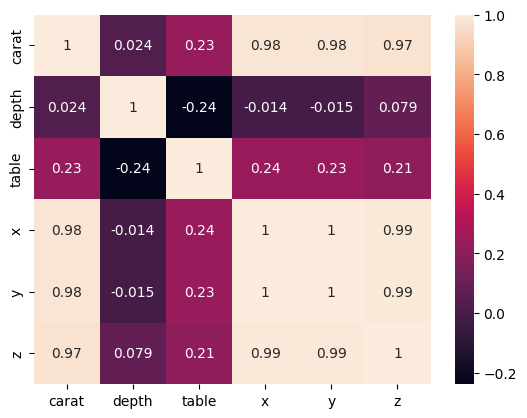

In [44]:
sns.heatmap(df[num_cols].corr(),annot=True)

##### We can only see correlation between Numeric Columns

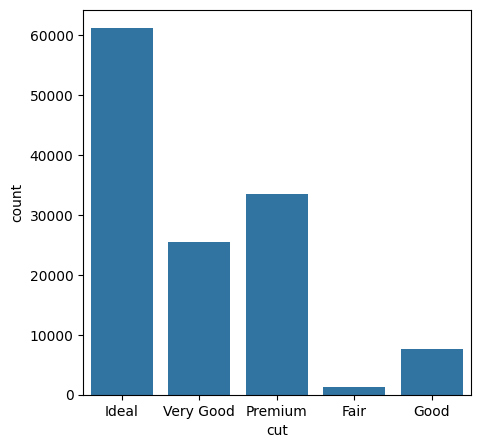

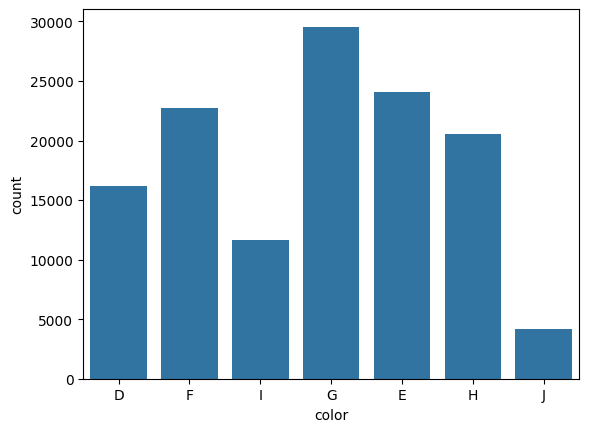

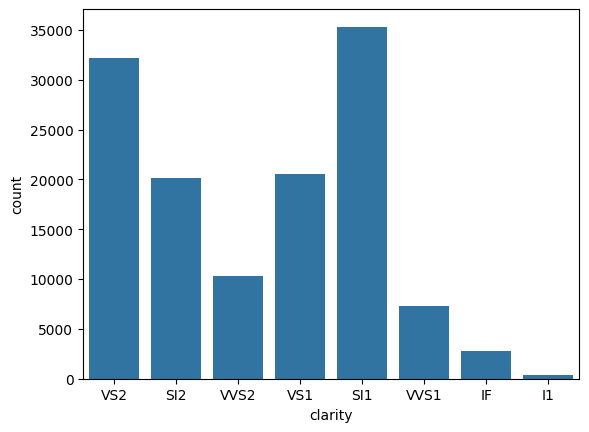

In [51]:
plt.figure(figsize=(5,5))
for i in cat_cols:
    sns.countplot(df,x=i,legend=True)
    plt.show()

In [52]:
df_copy=df.copy()

In [53]:
df_num=df[num_cols]

In [54]:
df_cat=df[cat_cols]

In [55]:
df_cat['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], dtype=object)

In [56]:
df_cat['color'].unique()

array(['D', 'F', 'I', 'G', 'E', 'H', 'J'], dtype=object)

In [57]:
df_cat['clarity'].unique()

array(['VS2', 'SI2', 'VVS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

##### NOTE
We can't pass the categorical values for the model training. Hence We'll have to encode the categorical data before feeding it to the model.

In [58]:
cut_map={'Ideal':4, 'Very Good':3, 'Premium':5, 'Fair':2, 'Good':1}
color_map={'E':6, 'I':2, 'J':1, 'H':3, 'F':5, 'G':4, 'D':7}
clarity_map={'SI1':3, 'VS2':4, 'SI2':2, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8, 'I1':1}

In [59]:
df['cut']=df['cut'].map(cut_map)

In [60]:
df['color']=df['color'].map(color_map)
df['clarity']=df['clarity'].map(clarity_map)

In [61]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.35,4,7,4,62.3,56.0,4.51,4.54,2.82
1,0.77,3,5,2,62.8,56.0,5.83,5.87,3.68
2,0.71,4,2,4,61.9,53.0,5.77,5.74,3.55
3,0.33,4,4,6,61.6,55.0,4.44,4.42,2.73
4,1.20,3,2,4,62.7,56.0,6.75,6.79,4.24
